# Logistic Regression on Image Classification 

This experiment is part of a longer journey toward building a complete image-classification system from scratch. I started with **linear and logistic regression** to understand baseline performance on my dataset before moving to more advanced models.

To train the model, all images were **resized to 64×64×3** and flattened into feature vectors. Logistic regression was then implemented manually (without deep-learning frameworks) using gradient descent, following the mathematical formulation learned in the course.

The model reached a test accuracy of **70ss%** , which provided a simple but useful baseline for understanding how well linear models can separate the classes in pixel space.

Even though the performance is limited, this step helped me validate the data pipeline, confirm that the labels and preprocessing work correctly, and prepare for more complex models in the upcoming stages of the project.


insted of running `train.py` you can run this jupyter-lab file

In [1]:
import time
import numpy as np
import sys
sys.path.append("../src")
from logistic_regression.xml_utils import parse_cvat_xml_all_labels, label_Y_binary
from logistic_regression.data_loader import load_and_resize_images, build_label_array
from logistic_regression.model import model
from logistic_regression.eval_utils import print_report
from logistic_regression.visualization import plot_costs

In [2]:
TRAIN_XML = "../EIDSeg_Dataset/data/train/train.xml"
TEST_XML = "../EIDSeg_Dataset/data/test/test.xml"
TRAIN_IMAGES = "../EIDSeg_Dataset/data/train/images/default"
TEST_IMAGES = "../EIDSeg_Dataset/data/test/images/default"

IMAGE_SIZE = (64, 64)
NUM_ITER = 2000
LR = 0.001

## Load and parse XML labels

In [3]:
labels_train_raw = parse_cvat_xml_all_labels(TRAIN_XML)
labels_test_raw = parse_cvat_xml_all_labels(TEST_XML)

Y_train_map = label_Y_binary(labels_train_raw)
Y_test_map = label_Y_binary(labels_test_raw)

## Load and preprocess images

In [4]:
X_train_org, ordered_train = load_and_resize_images(TRAIN_IMAGES, size=IMAGE_SIZE)
X_test_org, ordered_test = load_and_resize_images(TEST_IMAGES, size=IMAGE_SIZE)

Y_train_org = build_label_array(ordered_train, Y_train_map)
Y_test_org = build_label_array(ordered_test, Y_test_map)

Final X shape: (2612, 64, 64, 3)
Final X shape: (327, 64, 64, 3)


## Flatten Inputs

In [5]:
train_x = X_train_org.reshape(X_train_org.shape[0], -1).T
test_x = X_test_org.reshape(X_test_org.shape[0], -1).T

print(train_x.shape, Y_train_org.shape)
print(test_x.shape, Y_test_org.shape)

(12288, 2612) (1, 2612)
(12288, 327) (1, 327)


## Train Model

In [6]:
results = model(train_x, Y_train_org, test_x, Y_test_org,num_iterations=NUM_ITER, learning_rate=LR, print_cost=True)

Iteration 0 - cost: 0.693147
Iteration 100 - cost: 0.599500
Iteration 200 - cost: 0.590629
Iteration 300 - cost: 0.584475
Iteration 400 - cost: 0.579510
Iteration 500 - cost: 0.575214
Iteration 600 - cost: 0.571359
Iteration 700 - cost: 0.567826
Iteration 800 - cost: 0.564538
Iteration 900 - cost: 0.561447
Iteration 1000 - cost: 0.558515
Iteration 1100 - cost: 0.555717
Iteration 1200 - cost: 0.553032
Iteration 1300 - cost: 0.550446
Iteration 1400 - cost: 0.547945
Iteration 1500 - cost: 0.545520
Iteration 1600 - cost: 0.543163
Iteration 1700 - cost: 0.540868
Iteration 1800 - cost: 0.538628
Iteration 1900 - cost: 0.536440


## Evaluation

Train accuracy: 74.54%
Test accuracy : 73.70%
Costs recorded (every 100 iterations): 20 values


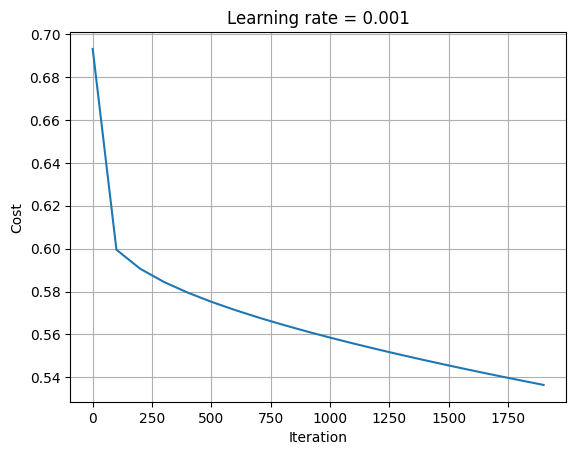

In [7]:
print_report(results)
plot_costs(results.get("costs", []), LR)